<a href="https://colab.research.google.com/github/Honnappa11/MedicalInsurencePrediction/blob/main/Project_10_Medical_Insurance_Cost_Prediction_using_Machine_Learning_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Data Collection and Analysis**

In [ ]:
# loading the data from csv file to a Pandas Dataframe
insurence_data=pd.read_csv('/content/insurance.csv')

In [ ]:
# first 5 rows of the dataframe
insurence_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# number of rows and columns
insurence_data.shape

(1338, 7)

In [ ]:
# checking for missing values
insurence_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# getting some information about the dataset
insurence_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# statistical measure of the dataset
insurence_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-8-d8c85f9f47b9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurence_data['age'],color='yellow')


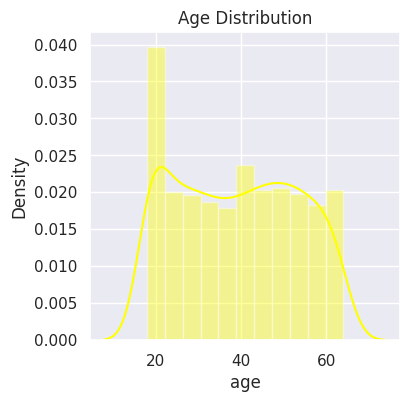

In [ ]:
# distribution of age value
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(insurence_data['age'],color='yellow')
plt.title('Age Distribution')
plt.show()

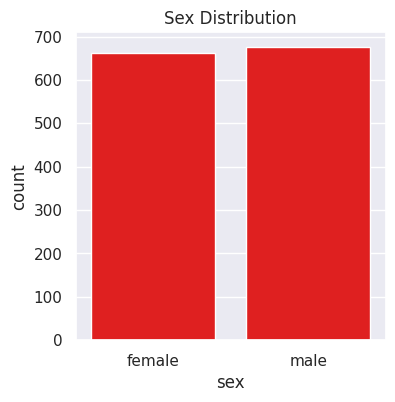

In [ ]:
# Gender column
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data=insurence_data,color='red')
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurence_data['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-11-ecff00f7c528>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurence_data['bmi'],color='green')


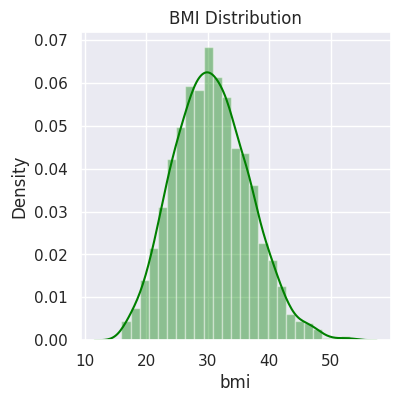

In [ ]:
# bmi Distribution
plt.figure(figsize=(4,4))
sns.distplot(insurence_data['bmi'],color='green')
plt.title('BMI Distribution')
plt.show()

In [ ]:
insurence_data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:
insurence_data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


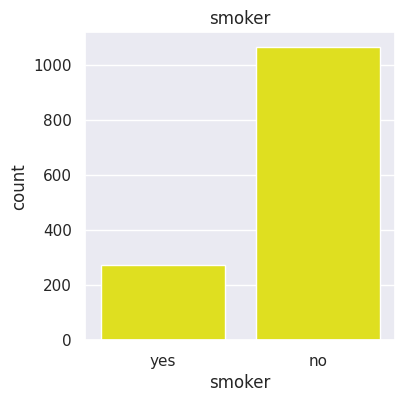

In [ ]:
# somker column
plt.figure(figsize=(4,4))
sns.countplot(x='smoker',data=insurence_data,color='yellow')
plt.title('smoker')
plt.show()

In [ ]:
insurence_data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


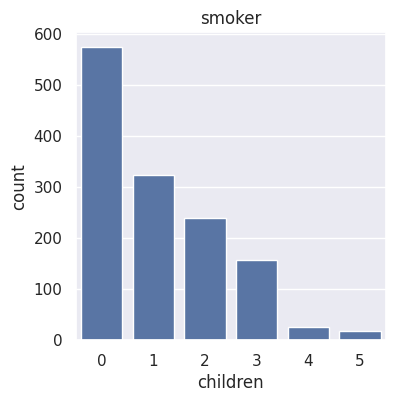

In [ ]:
# Children column
plt.figure(figsize=(4,4))
sns.countplot(x='children',data=insurence_data)
plt.title('smoker')
plt.show()

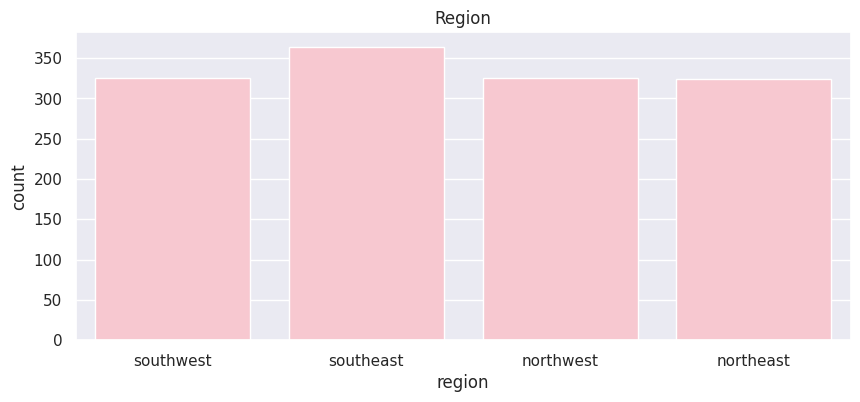

In [ ]:
# region column
plt.figure(figsize=(10,4))
sns.countplot(x='region',data=insurence_data,color='pink')
plt.title('Region')
plt.show()

In [ ]:
insurence_data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-19-8a33ec5425b5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurence_data['charges'])


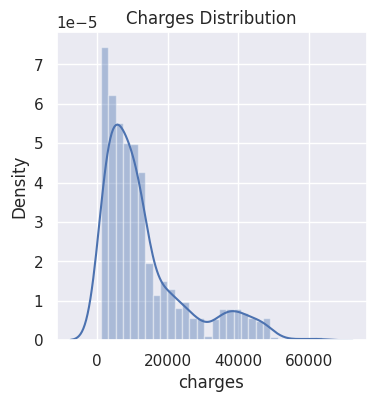

In [ ]:
# Distribution of charges value
plt.figure(figsize=(4,4))
sns.distplot(insurence_data['charges'])
plt.title('Charges Distribution')
plt.show()

**Data Pre-Processing**

Encoding the Categorical Features

In [ ]:
# encoding sex column
insurence_data.replace({'sex':{'female':0,'male':1}},inplace=True)

# encoding 'smoker' column
insurence_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# encoding 'region' column
insurence_data.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

<ipython-input-20-533df4ec3e4a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurence_data.replace({'sex':{'female':0,'male':1}},inplace=True)
<ipython-input-20-533df4ec3e4a>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurence_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
<ipython-input-20-533df4ec3e4a>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future

In [ ]:
insurence_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


**Splitting the Features and Target**

In [ ]:
x=insurence_data.drop(columns='charges',axis=1)
y=insurence_data['charges']

In [ ]:
print(x)


      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       0       0
1      18    1  33.770         1       1       1
2      28    1  33.000         3       1       1
3      33    1  22.705         0       1       2
4      32    1  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       1       2
1334   18    0  31.920         0       1       3
1335   18    0  36.850         0       1       1
1336   21    0  25.800         0       1       0
1337   61    0  29.070         0       0       2

[1338 rows x 6 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


**Splitting the data into Training data and Testing data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
print(x.shape,x_train.shape,y_train.shape)

(1338, 6) (1204, 6) (1204,)


**Model Training**

**Linear Regression**

In [ ]:
# loading the Linear Regression model
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

**Model Evaluation**

In [ ]:
# Prediction on Training data
x_train_prediction=model.predict(x_train)

In [ ]:
# R squared value
r2_train=metrics.r2_score(y_train,x_train_prediction)
print('R squared value : ',r2_train)

R squared value :  0.7539643636734955


In [ ]:
# Prediction on Testing data
x_test_prediction=model.predict(x_test)

In [ ]:
# R squared value
r2_test=metrics.r2_score(y_test,x_test_prediction)
print('R squared value : ',r2_test)

R squared value :  0.7032434167136936


**Building Predictive System**

In [ ]:
input_data=(33,1,22.705,0,1,2)

# changing input_data to a numpy array
input_data_asarray=np.asarray(input_data)

# reshape the array
input_data_reshaped=input_data_asarray.reshape(1,-1)

predict=model.predict(input_data_reshaped)
print(predict)


print('The Insurence cost is USD : ',predict[0])

[3562.12163393]
The Insurence cost is USD :  3562.1216339310868


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle


In [ ]:
filename='medical_insurance_data.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
# loading the saved model
load_model=pickle.load(open('medical_insurance_data.sav','rb'))

In [ ]:
input_data=(33,1,22.705,0,1,2)

# changing input_data to a numpy array
input_data_asarray=np.asarray(input_data,dtype=np.float32)

# reshape the array
input_data_reshaped=input_data_asarray.reshape(1,-1)

predict=load_model.predict(input_data_reshaped)
print(predict)


print('The Insurence cost is USD : ',predict[0])

[3562.12160738]
The Insurence cost is USD :  3562.121607376672


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
